In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model

def model_load(model=''):
  return load_model(model)

In [ ]:
lstm=model_load('/content/drive/MyDrive/CSE-400(Project Thesis)/hash_lstm.h5')
gru=model_load('/content/drive/MyDrive/CSE-400(Project Thesis)/hash_gru.h5')
cnn_lstm=model_load('/content/drive/MyDrive/CSE-400(Project Thesis)/hash_cnn_lstm.h5')
cnn_gru=model_load('/content/drive/MyDrive/CSE-400(Project Thesis)/hash_cnn_gru.h5')

In [ ]:
!pip install bnlp-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 7.4 MB/s 
     |████████████████████████████████| 23.9 MB 1.4 MB/s 
     |████████████████████████████████| 965 kB 66.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import re
from bnlp.corpus import stopwords

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
def preprocess(data):
    """This function is for preprocessing of the news contents. It removes punctuations, English characters and both of Bangla
    and English numerals. It tokenizes all the words and also removes stopwords.
    
    Args: 
        The Entire Dataframe
    Returns:
        Preprocessed news corpuses in a list of lists
    """
    corpus=[]
    for i in range(0, len(data)):
        x=re.sub('[^\u0980-\u09FF]',' ',data['content'][i])
        x=re.sub('[a-zA-Z0-9]+', ' ', x)
        x=re.sub('[০১২৩৪৫৬৭৮৯]+', ' ', x)
        x=x.split()
        x=[w for w in x if w not in set(stopwords)]
        x=' '.join(x)
        corpus.append(x)
    
    return corpus

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set()

In [ ]:
label_auth=pd.read_csv(r'/content/drive/MyDrive/AutoEncoders/LabeledAuthentic-7K.csv') #, nrows=3067)
label_fake=pd.read_csv(r'/content/drive/MyDrive/AutoEncoders/LabeledFake-1K.csv') #, nrows=995)
label_auth.drop(['source','relation'], axis=1, inplace=True)
label_fake.drop(['source','relation','F-type'], axis=1, inplace=True)
df=pd.concat([label_auth, label_fake], axis=0)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df['label']=np.where(df['label']==0.0, 0, 1)
df.tail()
df=df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

(8501, 7)


,articleID,domain,date,category,headline,content,label
0,546,earki.com,"১৪:৩২, নভেম্বর ১৫, ২০১৮",Miscellaneous,নয়াপল্টনের সংঘর্ষে আলোচিত হেলমেটদলের সদস্য বাং...,গতকাল (১৪ নভেম্বর) নয়াপল্টনে বিএনপির কার্যালয়ে...,0
1,5931,mzamin.com,2018-09-23 23:20:59,Miscellaneous,‘ধানের শীষ এখন পেটের বিষ’,বিএনপি এখন দেউলিয়া দল। দেশের মানুষ তাদের বর্জন...,1
2,7924,bangla.thereport24.com,2018-10-11 13:27:45,Crime,এক বিন্দুও ছাড় নয় : ডিএমপি কমিশনার,২১ আগস্ট গ্রেনেড হামলা মামলার রায় ঘিরে জনগণের ...,1
3,5431,bd24live.com,2018-09-22 12:27:46,Miscellaneous,"যেসব দেশে পতিতাবৃত্তি বৈধ ২২ সেপ্টেম্বর, ২০১৮ ...",নেদারল্যান্ডস: নেদারল্যান্ডসে পতিতাবৃত্তি শুধু...,1
4,2031,ittefaq.com.bd,2018-09-19 21:39:40,Sports,ভারত—পাকিস্তানের উত্তেজনাময় ম্যাচ আজ,ক্রিকেট দুনিয়ার সবচেয়ে আর্কষণীয় লড়াইয়ের তালিকা...,1


In [ ]:
corpus=preprocess(df)
corpus[16:20]

['বিশিষ্ট অভিনেত্রী চলচ্চিত্র নির্মাতা কোহিনূর আক্তার সুচন্দার জন্মদিন উপলক্ষে বরাবরের নাতি নাতনিদের আনন্দে কাটছে নাতি নাতনিরাই ছোট বোন চম্পা ববিতা শুভেচ্ছা জানিয়েছেন ববিতা কানাডায় ছেলের বেড়াতে গেছেন টেলিফোনেই বোনকে জন্মদিনের শুভেচ্ছা জানান মিলিয়ে সারপ্রাইজের কাটছে সুচন্দার জন্মদিন সুভাষ দত্তের নির্দেশনায় কাগজের নৌকা চলচ্চিত্রে অভিনয়ের মধ্য দিয়ে সালে রূপালি পর্দায় পা রাখেন সূচন্দা পর্দা নামটি সুভাষ দত্তেরই এরপর শতাধিক চলচ্চিত্রে অভিনয় সুচন্দা নির্দেশিত একমাত্র চলচ্চিত্র বছর চলচ্চিত্রটি সালের জাতীয় চলচ্চিত্র পুরস্কার লাভ অভিনয় রিয়াজ শশী এটিএম শামসুজ্জামান প্রমুখ ব্যক্তি জীবনে সুচন্দা প্রয়াত নির্মাতা জহির রায়হানের স্ত্রী অভিনেত্রী ববিতা চম্পার বড় বোন সুচন্দা ছাড়াও সেপ্টেম্বর অমর নায়ক সালমান শাহ জন্মদিন টিভি চ্যানেলগুলোতেও প্রচার সালমান শাহকে অনুষ্ঠান অন্যদিকে বিশিষ্ট ডেন্টাল সার্জন স্বাধীন বাংলা বেতার কেন্দ্রের শব্দসৈনিক রবীন্দ্রসংগীত শিল্পী ড অরূপ রতন চৌধুরীর তম জন্মদিন এমএবি এলএ এমএস',
 'চালুর ব্যবহারকারীকে নির্দিষ্ট শব্দ উচ্চারণ ওভেনটি কতক্ষণ রান্না উল্লেখ রান্নার উপাদানের ফ্রোজেন ভেজ

In [ ]:
y=df['label']

In [ ]:
import tensorflow as tf
import keras
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.sequence import pad_sequences

In [ ]:
voc_size=150000
hashing_corpus=[hashing_trick(words, n=voc_size, hash_function='md5', lower=False) for words in corpus]

In [ ]:
sent_length=300
embedded_docs=pad_sequences(hashing_corpus, maxlen=sent_length, truncating='post')
print(embedded_docs)

[[     0      0      0 ...  37540  27684 146556]
 [     0      0      0 ...  98419 128765  61779]
 [     0      0      0 ... 140883  80976  62841]
 ...
 [     0      0      0 ...  50471  87607 134000]
 [ 66150 130523 149829 ...  16284  98419 139054]
 [     0      0      0 ... 137564 142486 112133]]


In [ ]:
len(embedded_docs)

8501

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)
X_final.shape, y_final.shape

((8501, 300), (8501,))

In [ ]:
lstm_pred=lstm.predict(X_final)
gru_pred=gru.predict(X_final)
cnn_lstm_pred=cnn_lstm.predict(X_final)
cnn_gru_pred=cnn_gru.predict(X_final)

In [ ]:
lstm_pred=lstm_pred.round()
gru_pred=gru_pred.round()
cnn_lstm_pred=cnn_lstm_pred.round()
cnn_gru_pred=cnn_gru_pred.round()

In [ ]:
print(f'Actual Outcomes ---> {y_final[:10]}')
print(f'Prediction Outcomes in LSTM Model ---> {lstm_pred[:10]}')
print(f'Prediction Outcomes in GRU Model ---> {gru_pred[:10]}')
print(f'Prediction Outcomes in CNN_LSTM Model ---> {cnn_lstm_pred[:10]}')
print(f'Prediction Outcomes in CNN_GRU Model ---> {cnn_gru_pred[:10]}')

Actual Outcomes ---> [0 1 1 1 1 1 1 1 1 0]
Prediction Outcomes in LSTM Model ---> [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]
Prediction Outcomes in GRU Model ---> [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]
Prediction Outcomes in CNN_LSTM Model ---> [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]
Prediction Outcomes in CNN_GRU Model ---> [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [ ]:
def model_accuracy(pred):
  return accuracy_score(y, pred)


lstm_accuracy=model_accuracy(lstm_pred).round(2)
gru_accuracy=model_accuracy(gru_pred).round(2)
cnn_lstm_accuracy=model_accuracy(cnn_lstm_pred).round(2)
cnn_gru_accuracy=model_accuracy(cnn_gru_pred).round(2)

In [ ]:
accuracy_scores={'Models Used':['LSTM', 'GRU', 'CNN-LSTM', 'CNN-GRU'],
                 'Accuracy':[lstm_accuracy, gru_accuracy, cnn_lstm_accuracy, cnn_gru_accuracy]
}


df_acc=pd.DataFrame(accuracy_scores)
df_acc=df_acc.sort_values('Accuracy')
df_acc.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/Accuarcy_DL_hashing.csv', index=False)

In [ ]:
acc_df=df_acc.set_index('Models Used')
acc_df

,Accuracy
Models Used,
LSTM,0.97
GRU,0.97
CNN-GRU,0.97
CNN-LSTM,0.98


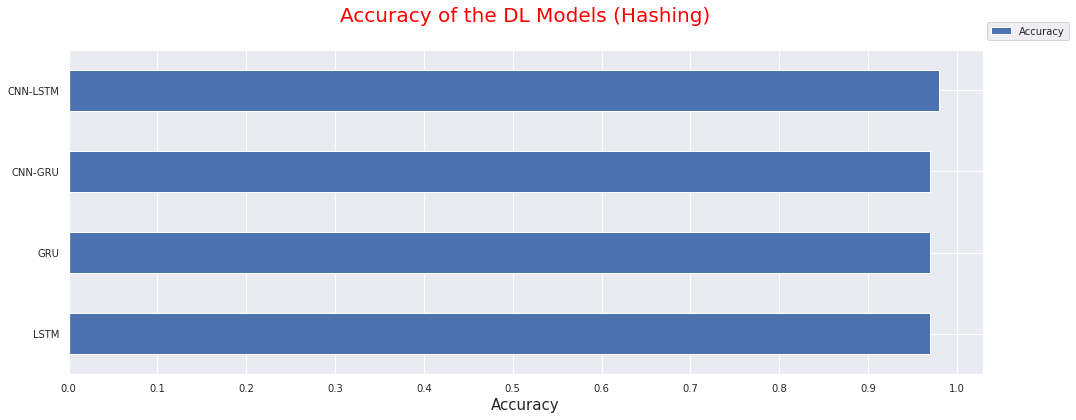

In [ ]:
acc_df.plot.barh(figsize=(15, 6));
plt.ylabel('')
plt.xlabel('Accuracy', fontsize=15)
plt.title('Accuracy of the DL Models (Hashing)\n', fontsize=20, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
def fake_news_performance(pred, model_name=''):
  cm=confusion_matrix(y, pred)
  recall=np.diag(cm) / np.sum(cm, axis=1)
  precision=np.diag(cm) / np.sum(cm, axis=0)
  fake_recall=recall[0].round(2)
  fake_precision=precision[0].round(2)
  fake_f1_score=(2*fake_recall*fake_precision)/(fake_recall+fake_precision)
  fake_f1_score=fake_f1_score.round(2)
  label_names=['fake', 'real']
  df_cm=pd.DataFrame(cm, index=label_names, columns=label_names)
  plt.figure(figsize=(15, 6))
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 15}, fmt='g')
  plt.xticks(fontsize=15)
  plt.yticks(rotation=0, fontsize=15)
  plt.title('\nConfusion Matrix for '+model_name+' (Hashing)\n', fontsize=20, color='red')
  plt.show()
    
  print('-----------------------------------------------------------------------------------------------------------------')
  print(f'\nClassification Report for:--> {model_name} (Hashing) \n{classification_report(y, pred, target_names=label_names)}')

  return fake_precision, fake_recall, fake_f1_score

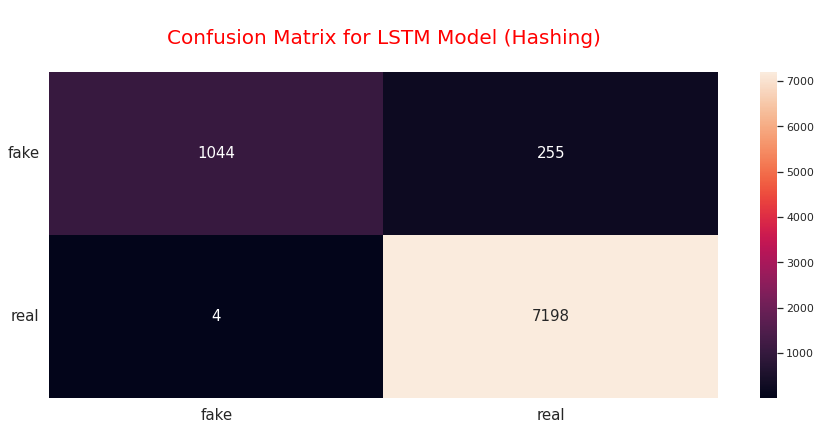

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> LSTM Model (Hashing) 
              precision    recall  f1-score   support

        fake       1.00      0.80      0.89      1299
        real       0.97      1.00      0.98      7202

    accuracy                           0.97      8501
   macro avg       0.98      0.90      0.94      8501
weighted avg       0.97      0.97      0.97      8501



In [ ]:
fake_precision_lstm, fake_recall_lstm, fake_f1_score_lstm=fake_news_performance(lstm_pred, 'LSTM Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using LSTM Model --> {fake_precision_lstm, fake_recall_lstm, fake_f1_score_lstm}, respectively')

Precision, Recall and F1 Score for Fake News Classification using LSTM Model --> (1.0, 0.8, 0.89), respectively


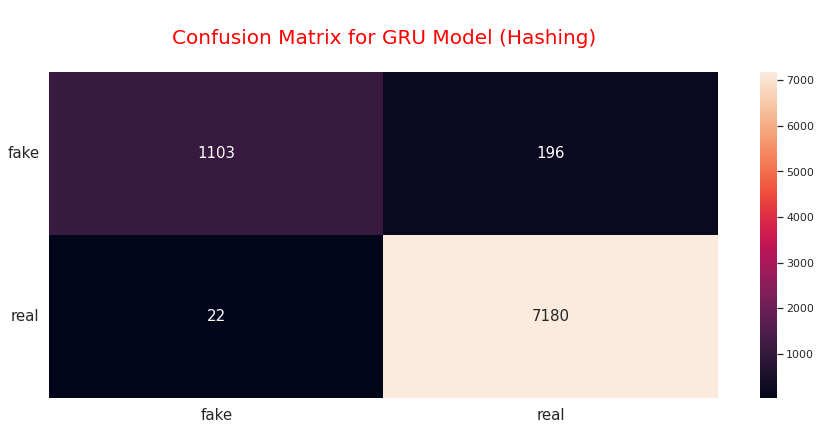

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> GRU Model (Hashing) 
              precision    recall  f1-score   support

        fake       0.98      0.85      0.91      1299
        real       0.97      1.00      0.99      7202

    accuracy                           0.97      8501
   macro avg       0.98      0.92      0.95      8501
weighted avg       0.97      0.97      0.97      8501



In [ ]:
fake_precision_gru, fake_recall_gru, fake_f1_score_gru=fake_news_performance(gru_pred, 'GRU Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using GRU Model --> {fake_precision_gru, fake_recall_gru, fake_f1_score_gru}, respectively')

Precision, Recall and F1 Score for Fake News Classification using GRU Model --> (0.98, 0.85, 0.91), respectively


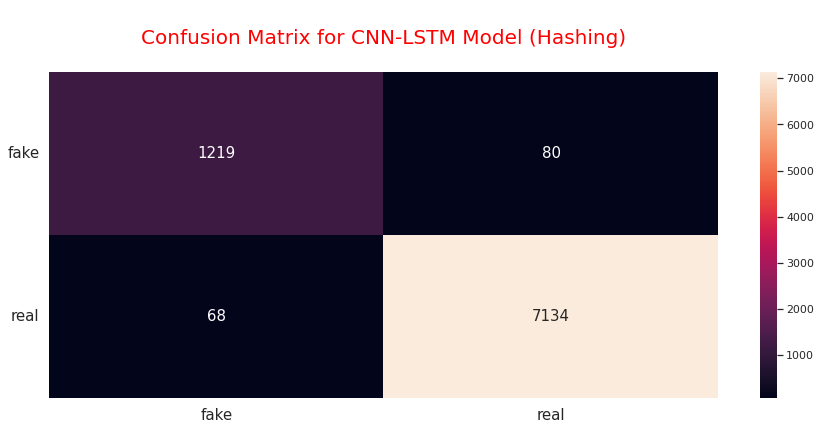

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> CNN-LSTM Model (Hashing) 
              precision    recall  f1-score   support

        fake       0.95      0.94      0.94      1299
        real       0.99      0.99      0.99      7202

    accuracy                           0.98      8501
   macro avg       0.97      0.96      0.97      8501
weighted avg       0.98      0.98      0.98      8501



In [ ]:
fake_precision_cnn_lstm, fake_recall_cnn_lstm, fake_f1_score_cnn_lstm=fake_news_performance(cnn_lstm_pred, 'CNN-LSTM Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using CNN-LSTM Model --> {fake_precision_cnn_lstm, fake_recall_cnn_lstm, fake_f1_score_cnn_lstm}, respectively')

Precision, Recall and F1 Score for Fake News Classification using CNN-LSTM Model --> (0.95, 0.94, 0.94), respectively


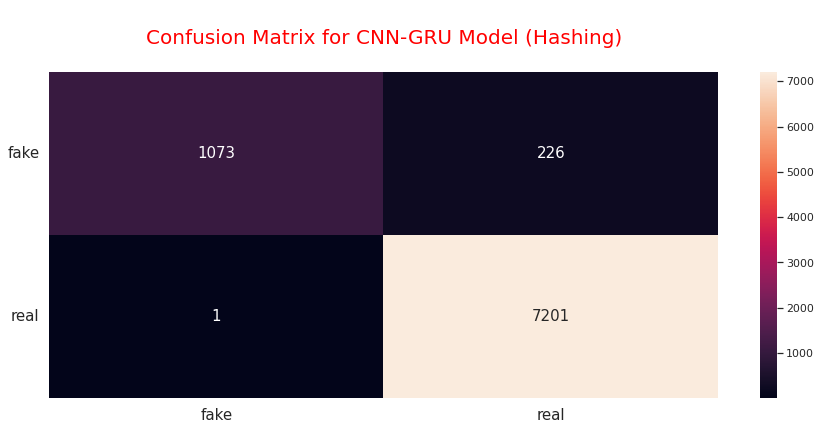

-----------------------------------------------------------------------------------------------------------------

Classification Report for:--> CNN-GRU Model (Hashing) 
              precision    recall  f1-score   support

        fake       1.00      0.83      0.90      1299
        real       0.97      1.00      0.98      7202

    accuracy                           0.97      8501
   macro avg       0.98      0.91      0.94      8501
weighted avg       0.97      0.97      0.97      8501



In [ ]:
fake_precision_cnn_gru, fake_recall_cnn_gru, fake_f1_score_cnn_gru=fake_news_performance(cnn_gru_pred, 'CNN-GRU Model')

In [ ]:
print(f'Precision, Recall and F1 Score for Fake News Classification using CNN-GRU Model --> {fake_precision_cnn_gru, fake_recall_cnn_gru, fake_f1_score_cnn_gru}, respectively')

Precision, Recall and F1 Score for Fake News Classification using CNN-GRU Model --> (1.0, 0.83, 0.91), respectively


In [ ]:
fake_perform={'Models Used':['LSTM', 'GRU', 'CNN-LSTM', 'CNN-GRU'],
              'Precision_fake':[fake_precision_lstm, fake_precision_gru, fake_precision_cnn_lstm, fake_precision_cnn_gru], 
              'Recall_fake':[fake_recall_lstm, fake_recall_gru, fake_recall_cnn_lstm, fake_recall_cnn_gru], 
              'F1-Score_fake':[fake_f1_score_lstm, fake_f1_score_gru, fake_f1_score_cnn_lstm, fake_f1_score_cnn_gru], 
              'Overall_Accuracy':[lstm_accuracy, gru_accuracy, cnn_lstm_accuracy, cnn_gru_accuracy]}

df_fake_perform=pd.DataFrame(fake_perform)
df_fake_perform

,Models Used,Precision_fake,Recall_fake,F1-Score_fake,Overall_Accuracy
0,LSTM,1.00,0.80,0.89,0.97
1,GRU,0.98,0.85,0.91,0.97
2,CNN-LSTM,0.95,0.94,0.94,0.98
3,CNN-GRU,1.00,0.83,0.91,0.97


In [ ]:
df_fake_perform.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/fake_news_detection_performance_DL.csv', index=False)

In [ ]:
df_fake_perform.groupby('Models Used')['Precision_fake'].sum().sort_values(ascending=False)

Models Used
CNN-GRU     1.00
LSTM        1.00
GRU         0.98
CNN-LSTM    0.95
Name: Precision_fake, dtype: float64

In [ ]:
df_fake_perform.groupby('Models Used')['Recall_fake'].sum().sort_values(ascending=False)

Models Used
CNN-LSTM    0.94
GRU         0.85
CNN-GRU     0.83
LSTM        0.80
Name: Recall_fake, dtype: float64

In [ ]:
df_fake_perform.groupby('Models Used')['F1-Score_fake'].sum().sort_values(ascending=False)

Models Used
CNN-LSTM    0.94
CNN-GRU     0.91
GRU         0.91
LSTM        0.89
Name: F1-Score_fake, dtype: float64

In [ ]:
df_fake_perform.set_index('Models Used', inplace=True)
df_fake_perform

,Precision_fake,Recall_fake,F1-Score_fake,Overall_Accuracy
Models Used,,,,
LSTM,1.00,0.80,0.89,0.97
GRU,0.98,0.85,0.91,0.97
CNN-LSTM,0.95,0.94,0.94,0.98
CNN-GRU,1.00,0.83,0.91,0.97


In [ ]:
df_fake_perform=df_fake_perform.sort_values('F1-Score_fake', ascending=False)
df_fake_perform

,Precision_fake,Recall_fake,F1-Score_fake,Overall_Accuracy
Models Used,,,,
CNN-LSTM,0.95,0.94,0.94,0.98
GRU,0.98,0.85,0.91,0.97
CNN-GRU,1.00,0.83,0.91,0.97
LSTM,1.00,0.80,0.89,0.97


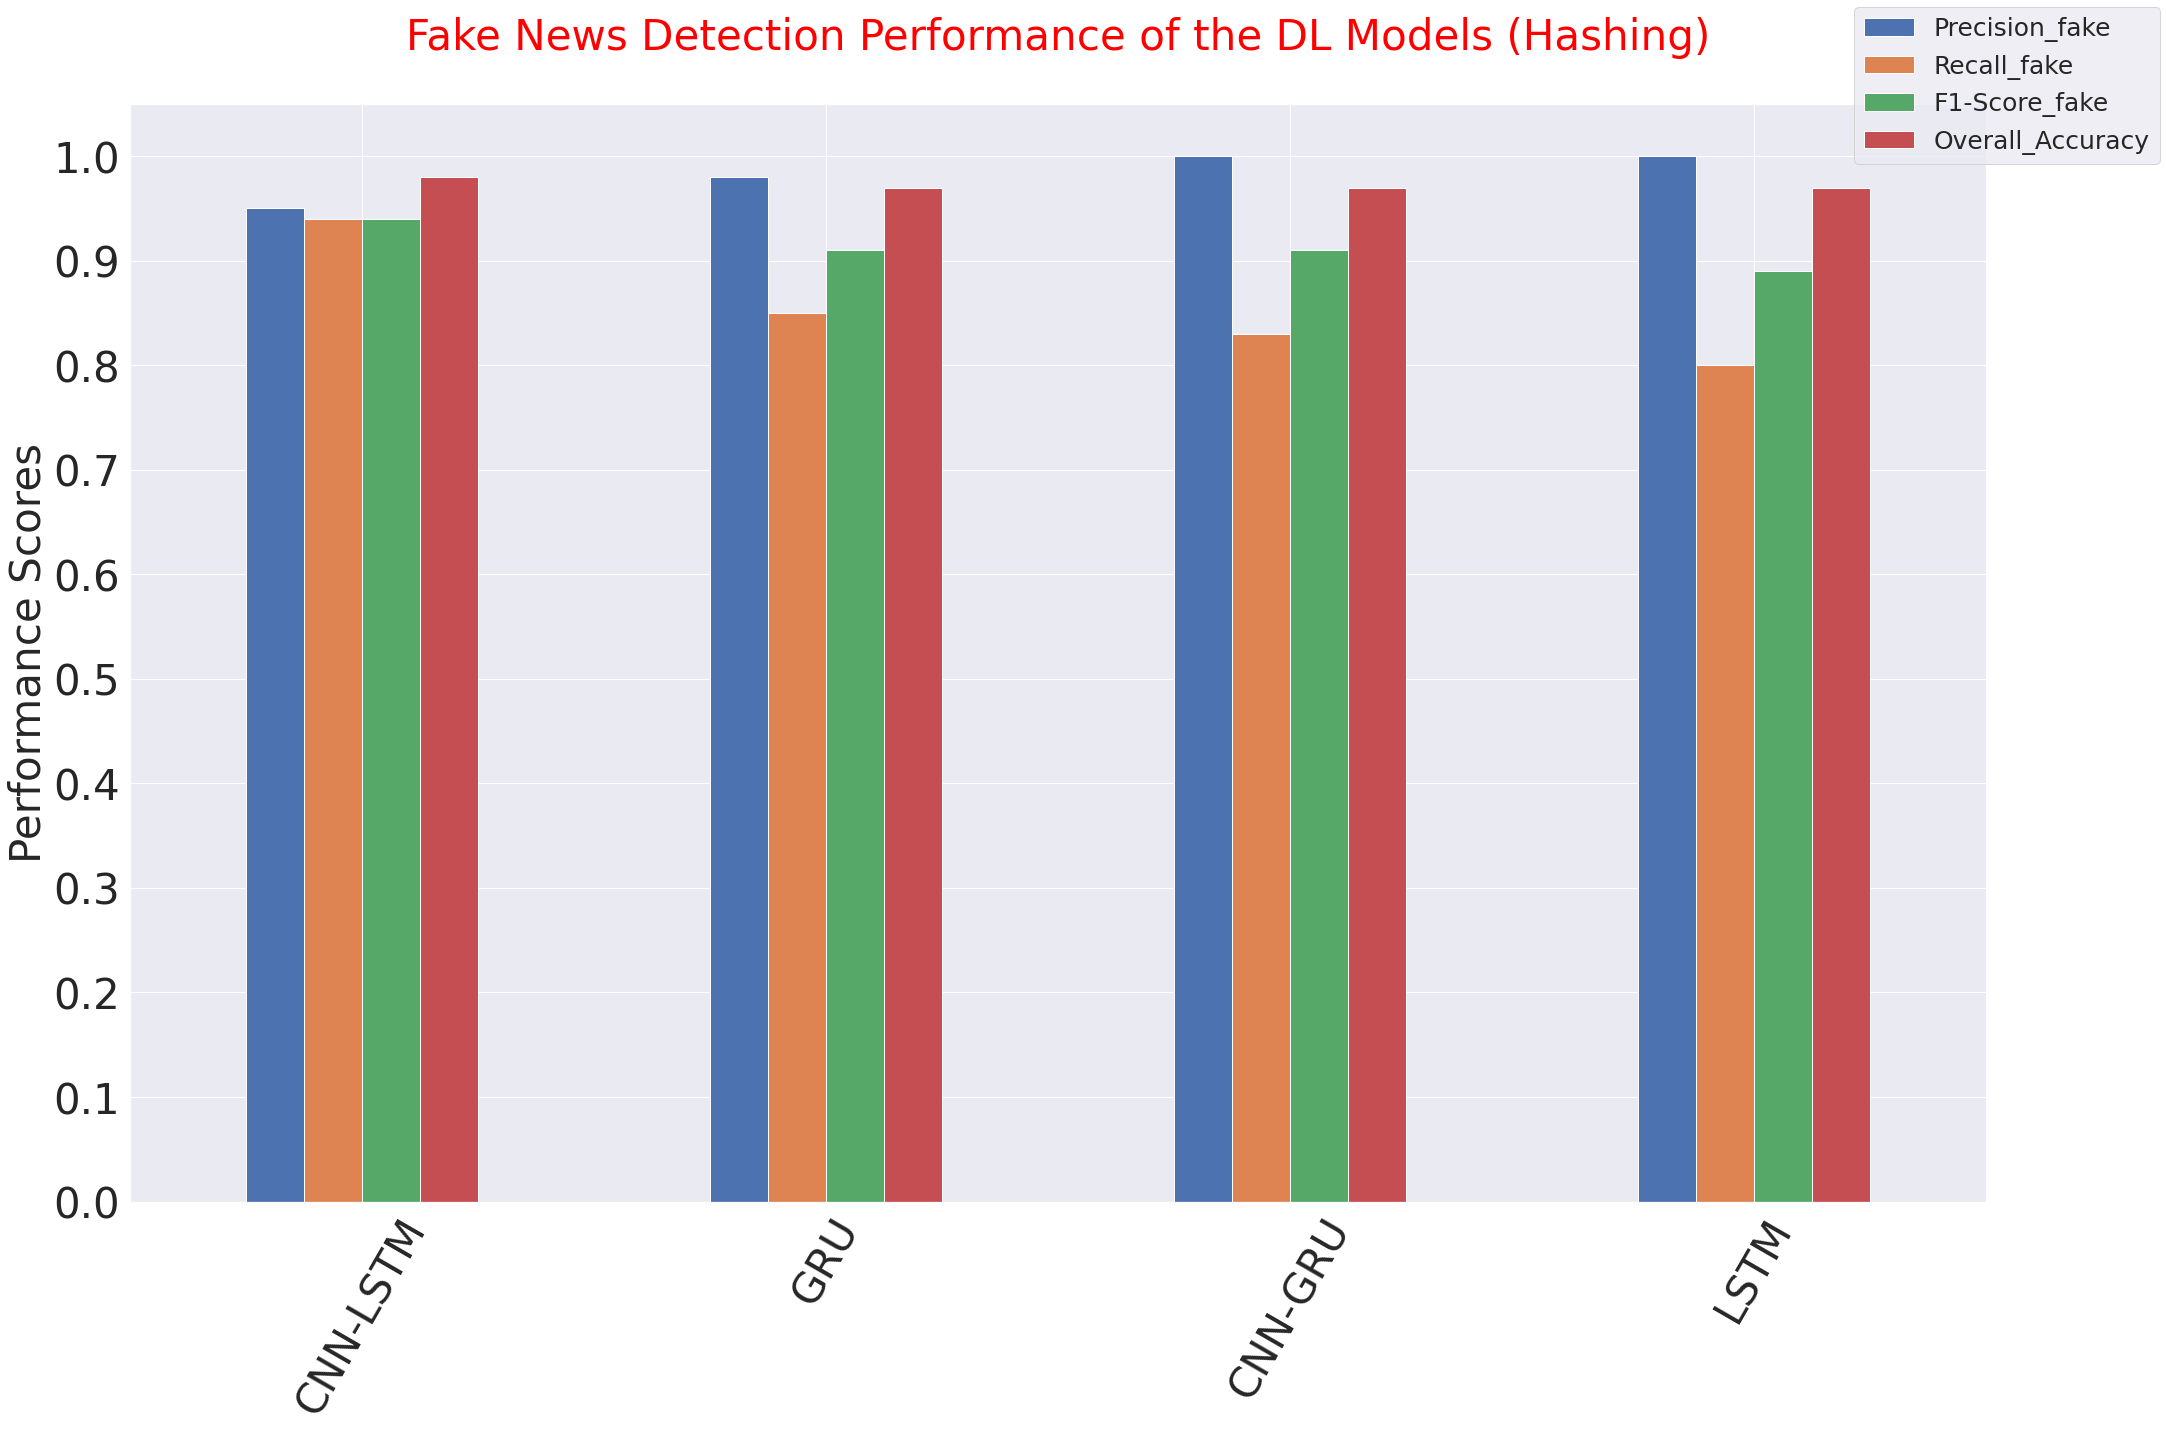

In [ ]:
df_fake_perform.plot.bar(rot=60, figsize=(30, 20));
plt.xlabel('')
plt.ylabel('Performance Scores', fontsize=42)
plt.title('Fake News Detection Performance of the DL Models (Hashing)\n', fontsize=42, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=25)
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=42)
plt.xticks(fontsize=42)
plt.tight_layout()
plt.show()

In [ ]:
fallout_lstm, sensitivity_lstm, thresholds_lstm=roc_curve(y, lstm_pred)
fallout_gru, sensitivity_gru, thresholds_gru=roc_curve(y, gru_pred)
fallout_cnn_lstm, sensitivity_cnn_lstm, thresholds_cnn_lstm=roc_curve(y, cnn_lstm_pred)
fallout_cnn_gru, sensitivity_cnn_gru, thresholds_cnn_gru=roc_curve(y, cnn_gru_pred)

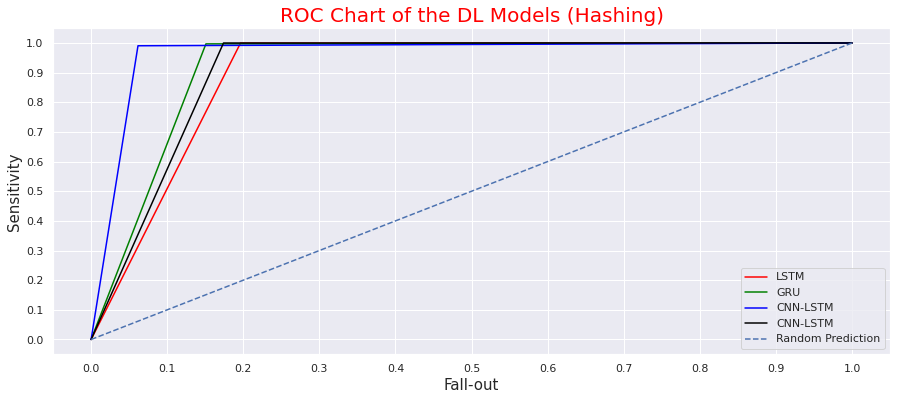

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(fallout_lstm, sensitivity_lstm, color='red', label='%s' % 'LSTM')
plt.plot(fallout_gru, sensitivity_gru, color='green', label='%s' % 'GRU')
plt.plot(fallout_cnn_lstm, sensitivity_cnn_lstm, color='blue', label='%s' % 'CNN-LSTM')
plt.plot(fallout_cnn_gru, sensitivity_cnn_gru, color='black', label='%s' % 'CNN-LSTM')
plt.plot([0,1], [0,1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart of the DL Models (Hashing)", color='red', fontsize=20)
plt.xlabel("Fall-out", fontsize=15)
plt.ylabel("Sensitivity", fontsize=15)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
plt.yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])
plt.legend(loc='best')
plt.show()

In [ ]:
def model_roc_auc_score(pred):
  return roc_auc_score(y, pred)

lstm_auc=model_roc_auc_score(lstm_pred).round(2)
gru_auc=model_roc_auc_score(gru_pred).round(2)
cnn_lstm_auc=model_roc_auc_score(cnn_lstm_pred).round(2)
cnn_gru_auc=model_roc_auc_score(cnn_gru_pred).round(2)

In [ ]:
auc_scores={'Models Used':['LSTM', 'GRU', 'CNN-LSTM', 'CNN-GRU'],
            'AUC':[lstm_auc, gru_auc, cnn_lstm_auc, cnn_gru_auc]}

df_auc=pd.DataFrame(auc_scores)
df_auc

,Models Used,AUC
0,LSTM,0.90
1,GRU,0.92
2,CNN-LSTM,0.96
3,CNN-GRU,0.91


In [ ]:
df_auc=df_auc.sort_values('AUC')
df_auc

,Models Used,AUC
0,LSTM,0.90
3,CNN-GRU,0.91
1,GRU,0.92
2,CNN-LSTM,0.96


In [ ]:
df_auc.to_csv('/content/drive/MyDrive/CSE-400(Project Thesis)/AUC_Scores_DL.csv', index=False)

In [ ]:
auc_df=df_auc.set_index('Models Used')
auc_df

,AUC
Models Used,
LSTM,0.90
CNN-GRU,0.91
GRU,0.92
CNN-LSTM,0.96


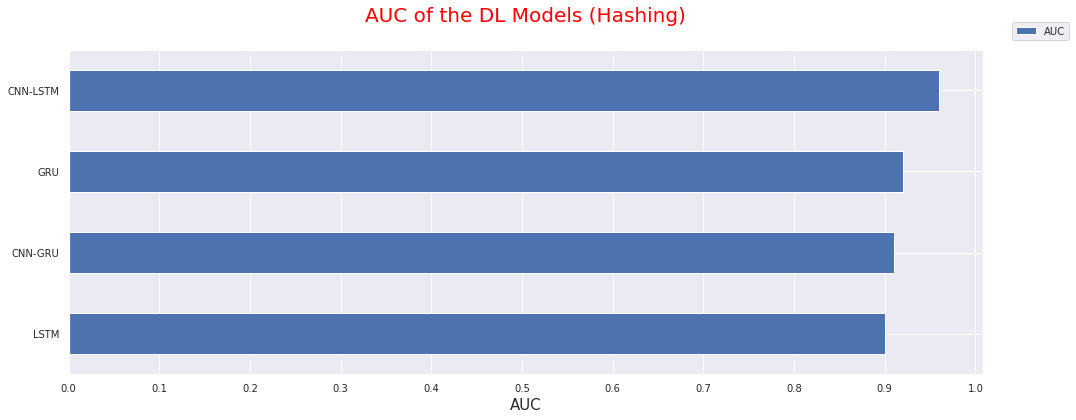

In [ ]:
auc_df.plot.barh(figsize=(15, 6));
plt.ylabel('')
plt.xlabel('AUC', fontsize=15)
plt.title('AUC of the DL Models (Hashing)\n', fontsize=20, color='red')
plt.legend(bbox_to_anchor=(1.1, 1.1), fontsize=10)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()